In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/customer_churn-2.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
df.shape

(7043, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.duplicated()
#df[df.duplicated()]

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
df['Partner'].dtype

dtype('O')

In [12]:
cols = list(df.columns)
for i in cols:
  if df[i].dtype == 'object':
    df[i] = df[i].astype('category').cat.codes


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int16  
 1   gender            7043 non-null   int8   
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int8   
 4   Dependents        7043 non-null   int8   
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int8   
 7   MultipleLines     7043 non-null   int8   
 8   InternetService   7043 non-null   int8   
 9   OnlineSecurity    7043 non-null   int8   
 10  OnlineBackup      7043 non-null   int8   
 11  DeviceProtection  7043 non-null   int8   
 12  TechSupport       7043 non-null   int8   
 13  StreamingTV       7043 non-null   int8   
 14  StreamingMovies   7043 non-null   int8   
 15  Contract          7043 non-null   int8   
 16  PaperlessBilling  7043 non-null   int8   


In [14]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
df['PaymentMethod'].value_counts()

2    2365
3    1612
0    1544
1    1522
Name: PaymentMethod, dtype: int64

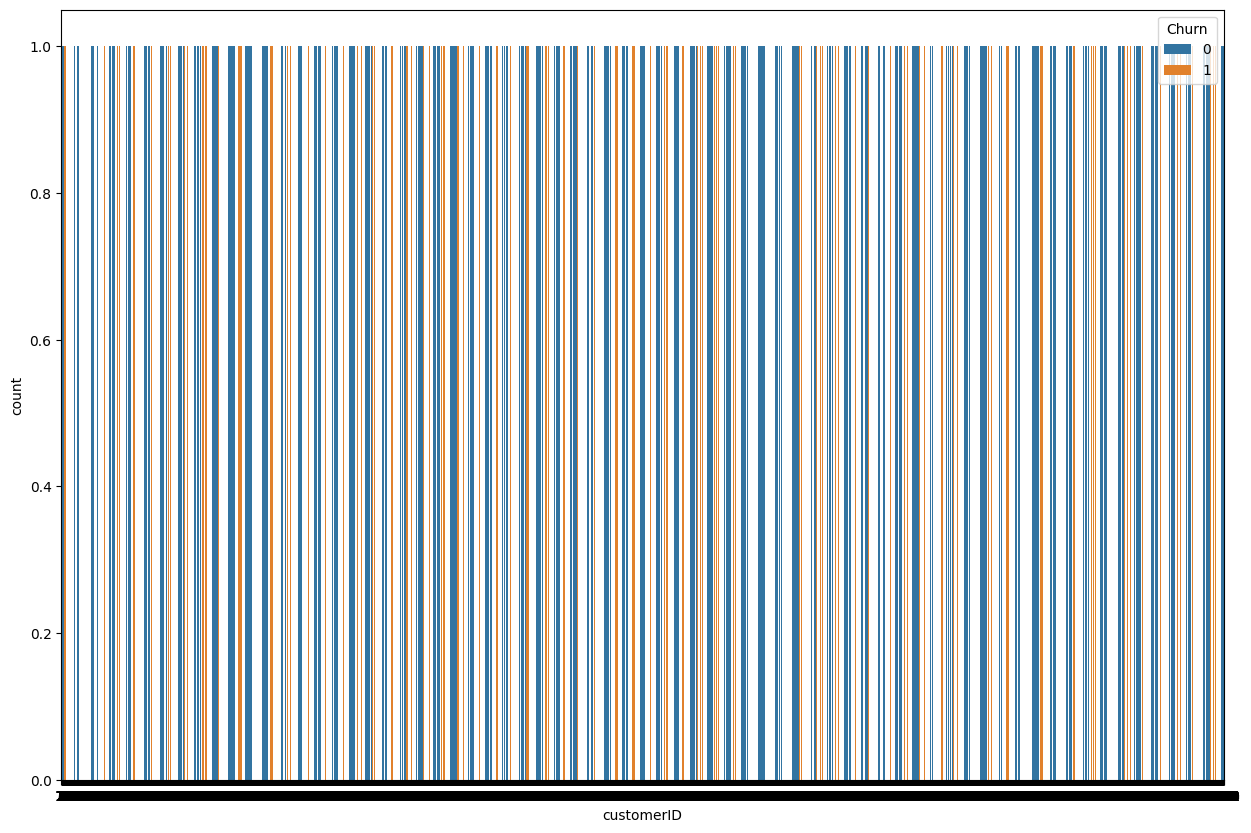

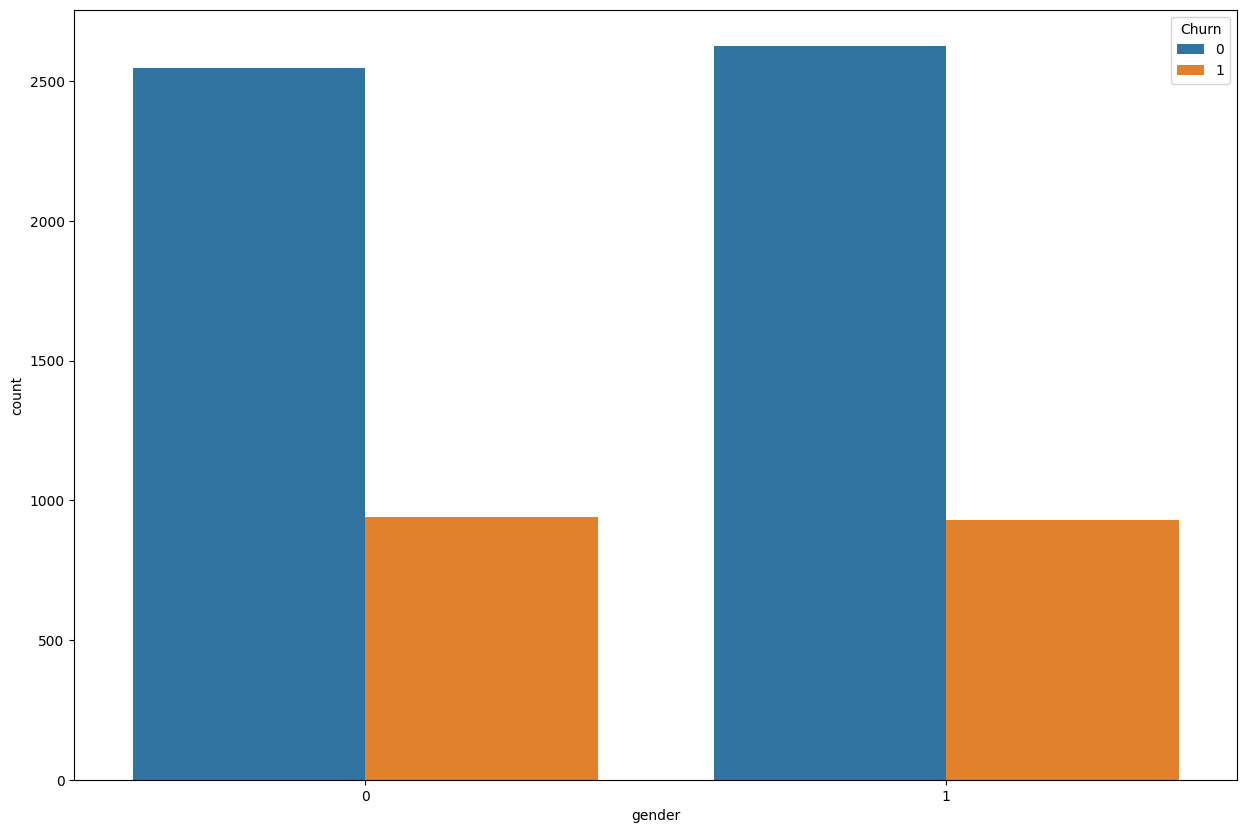

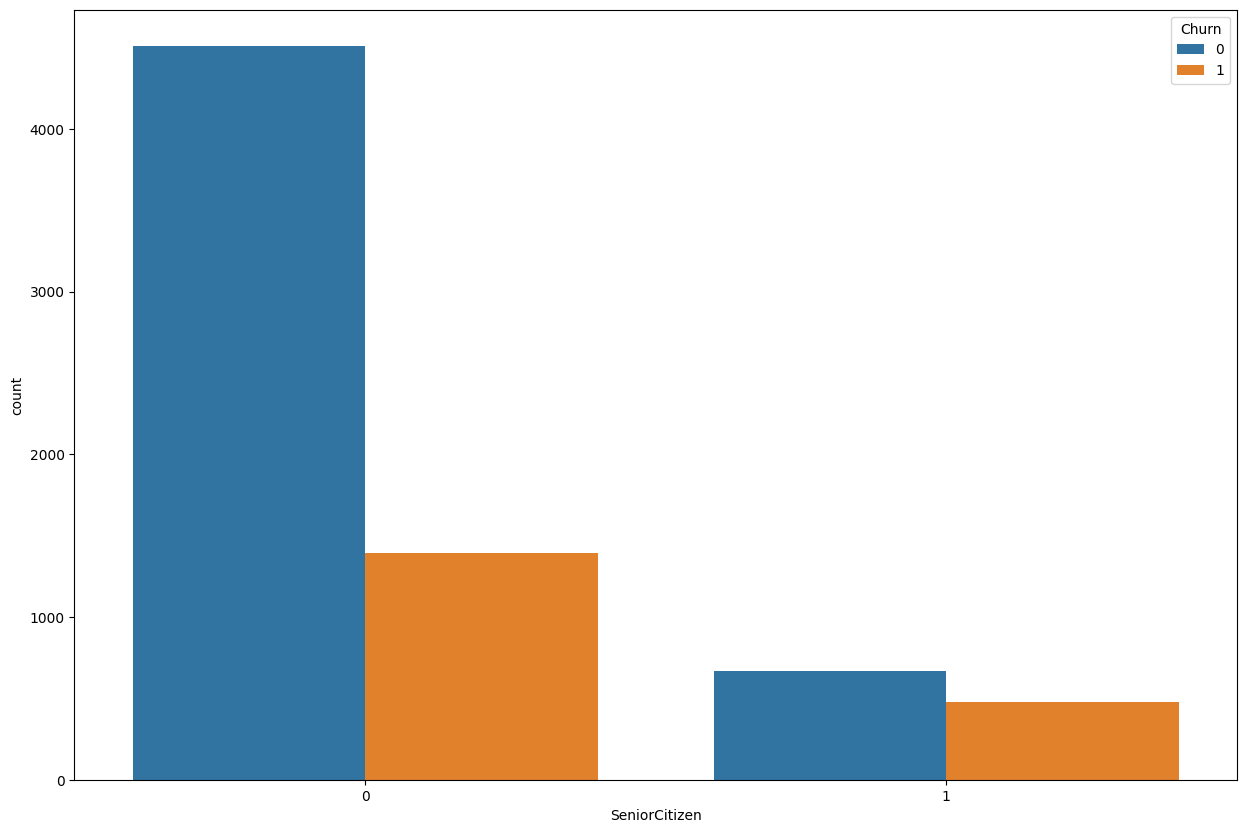

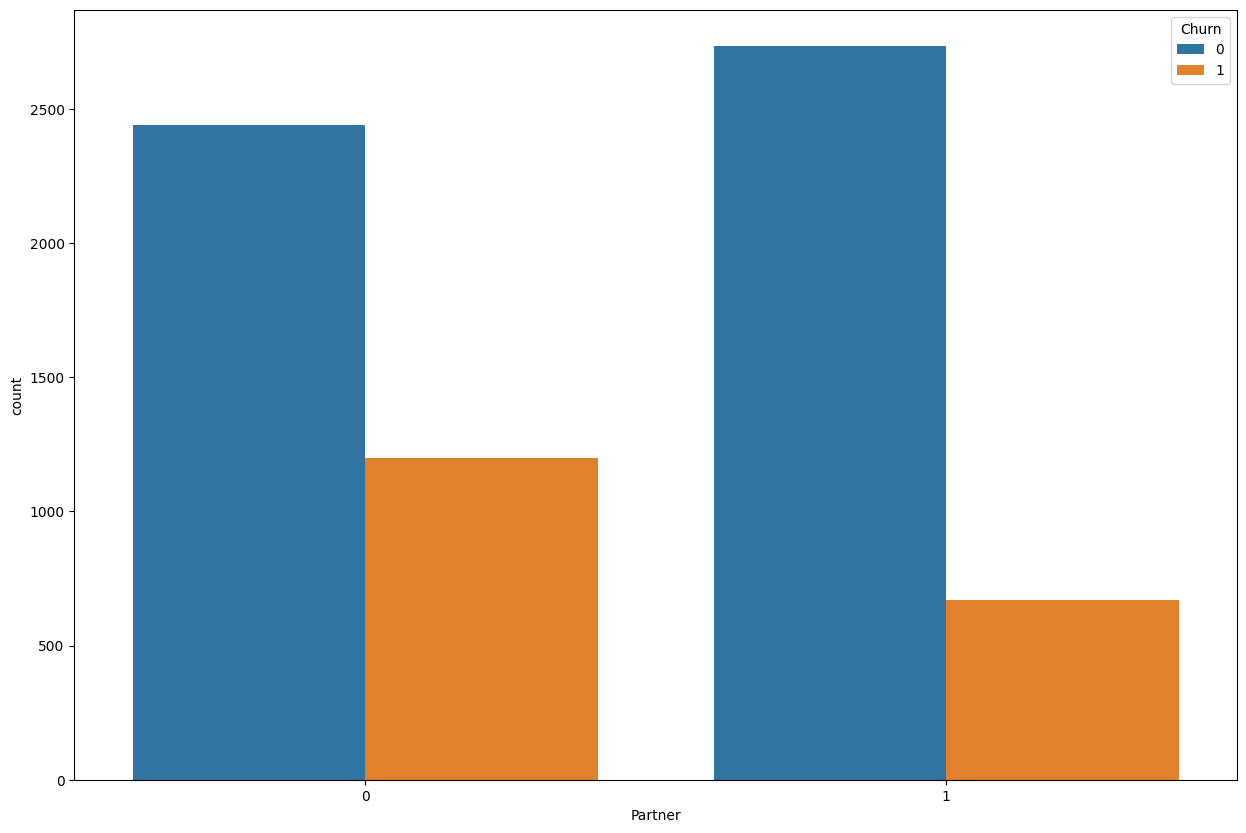

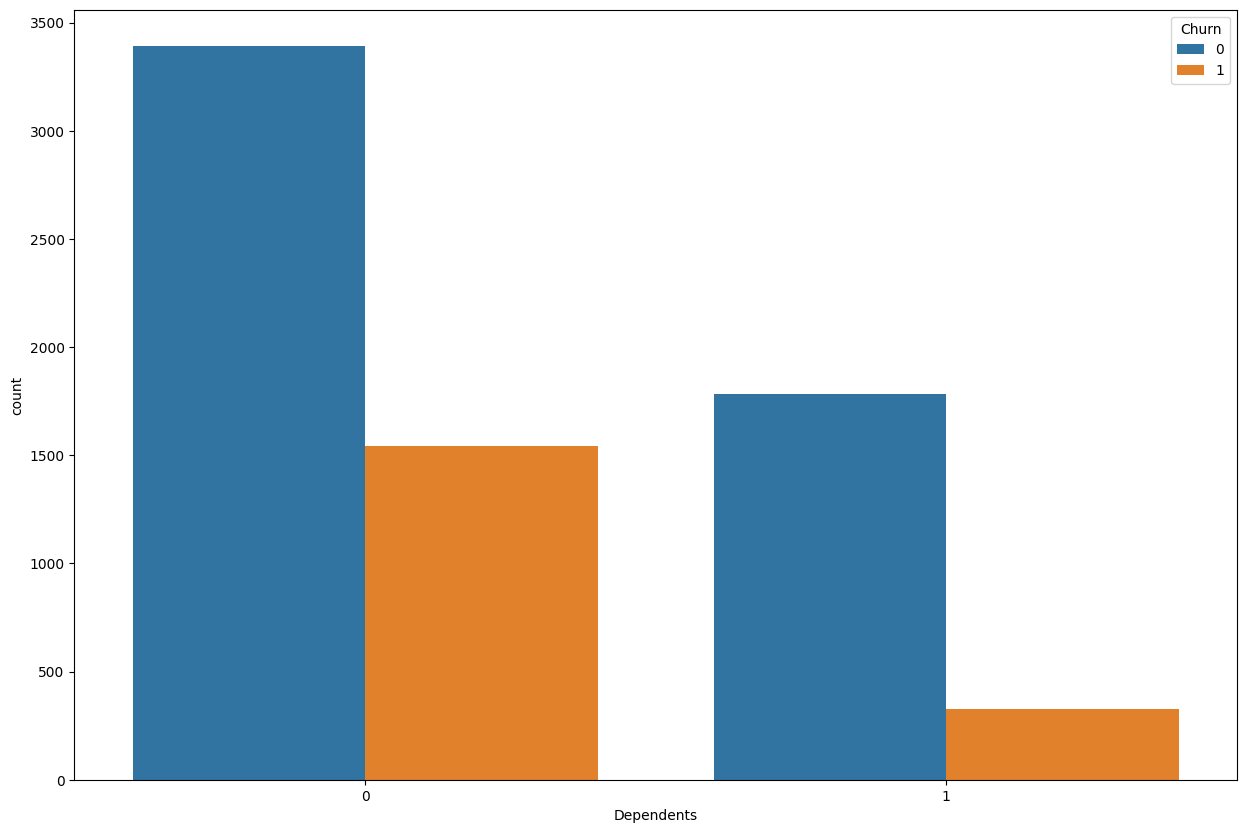

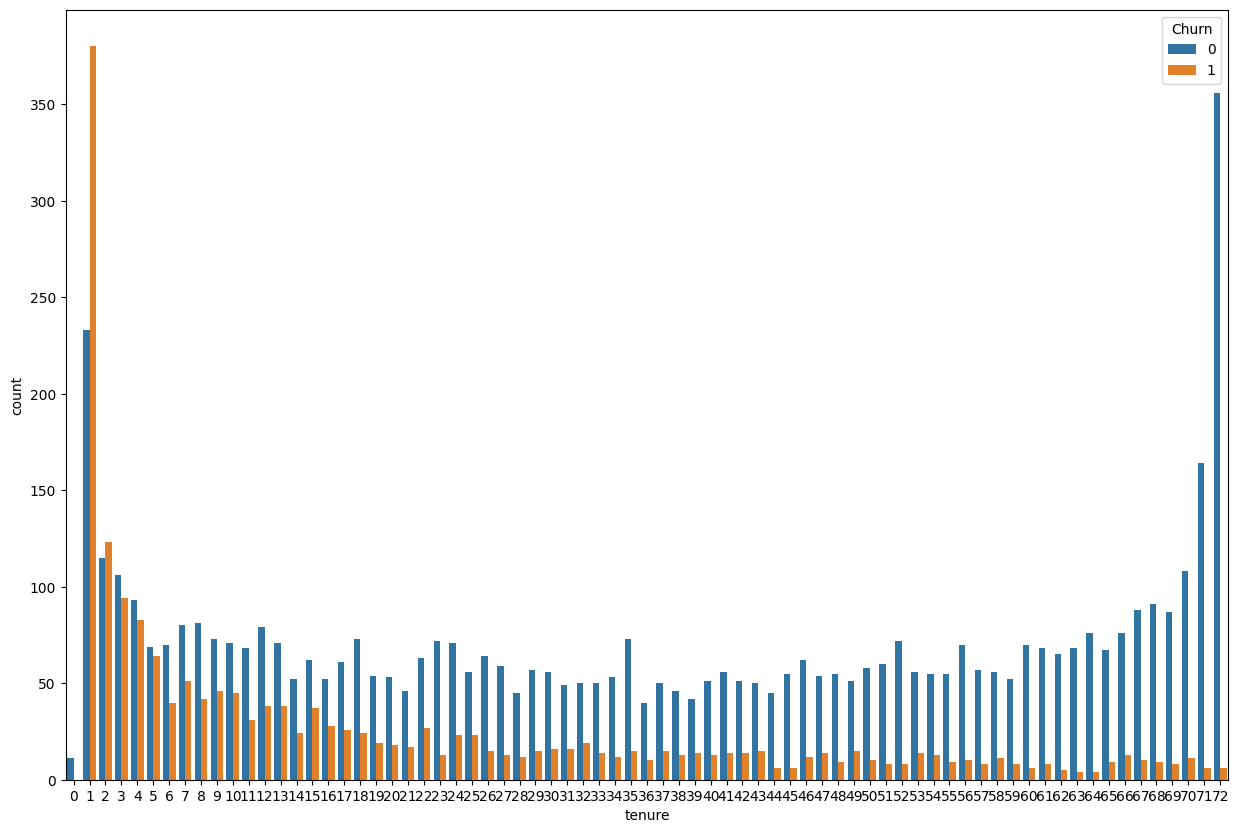

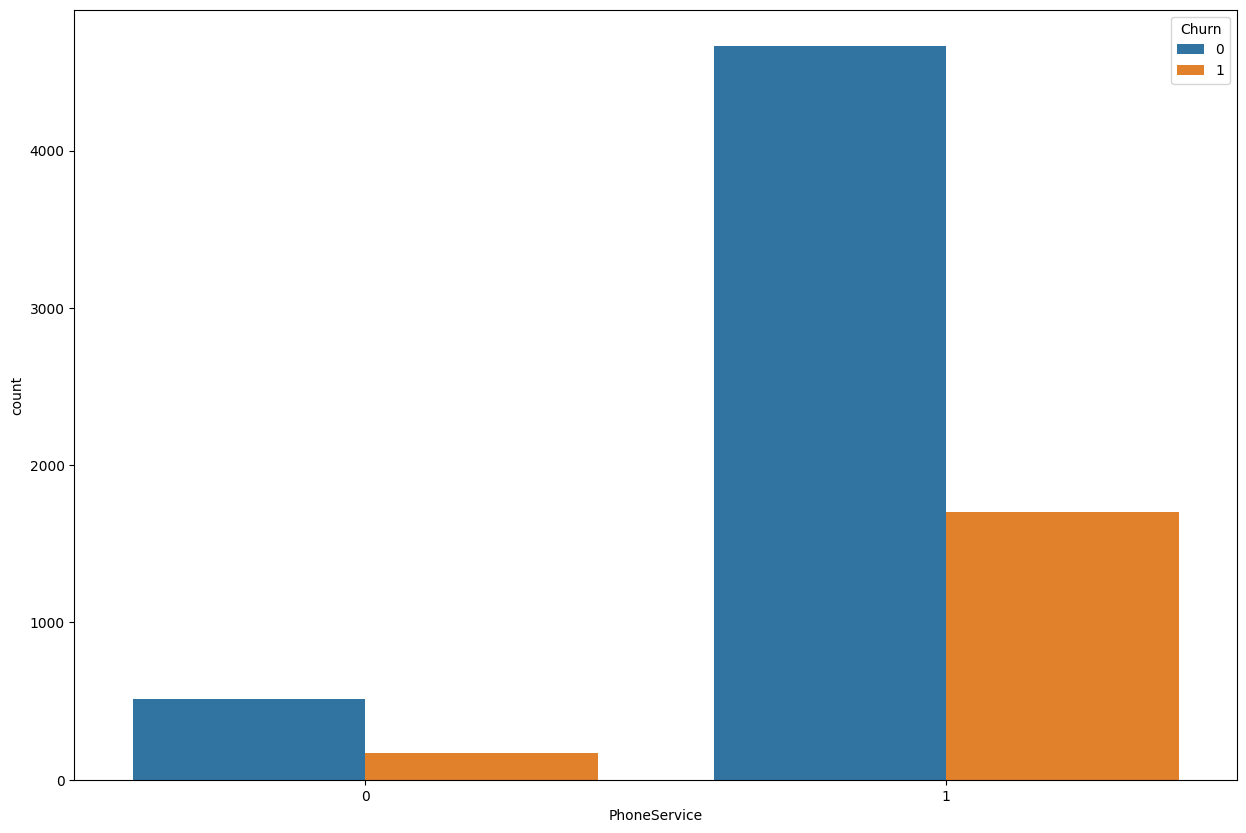

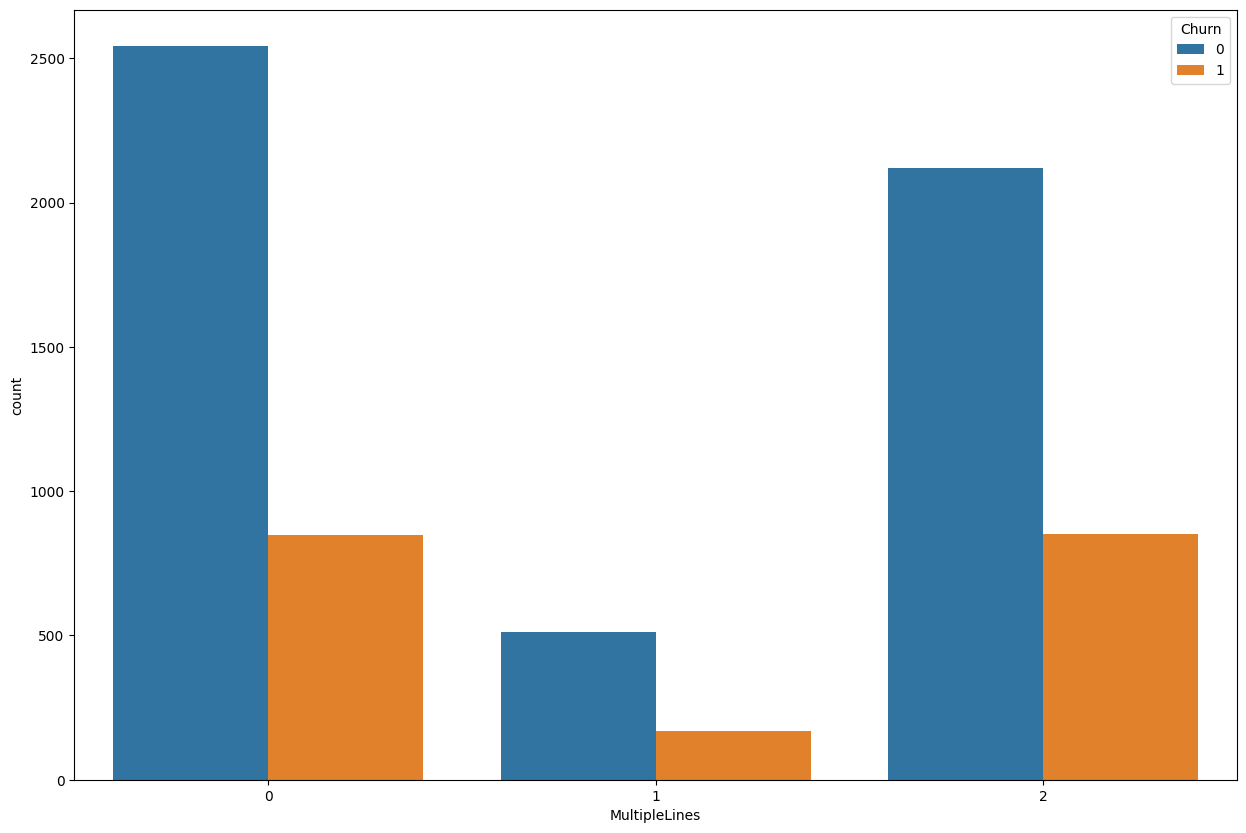

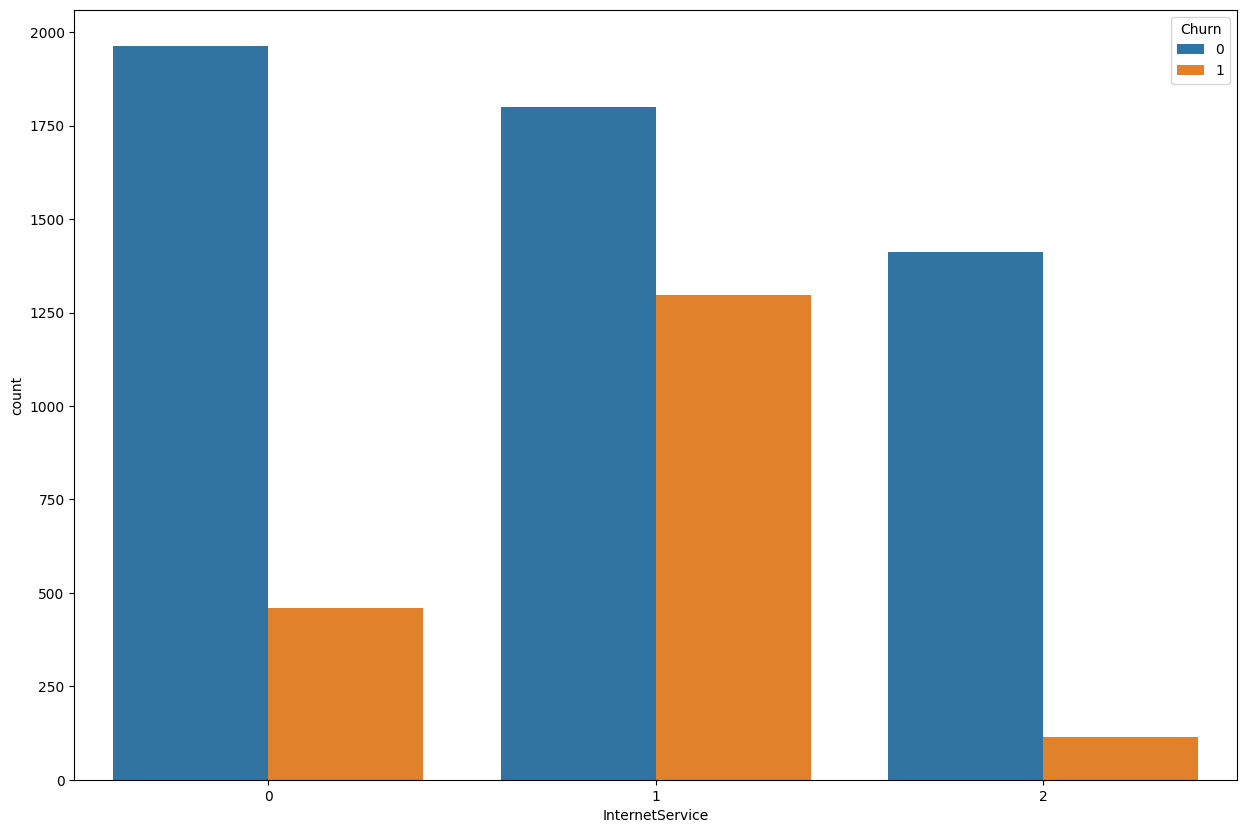

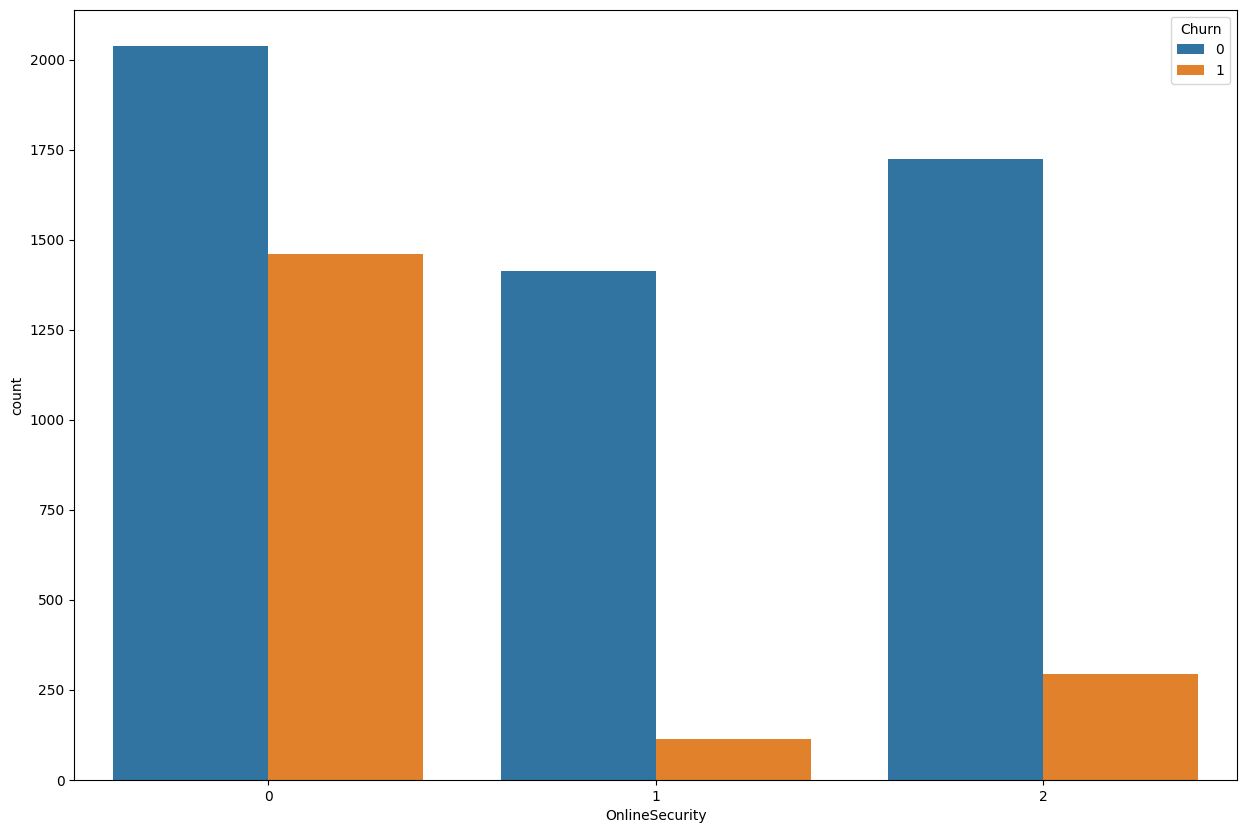

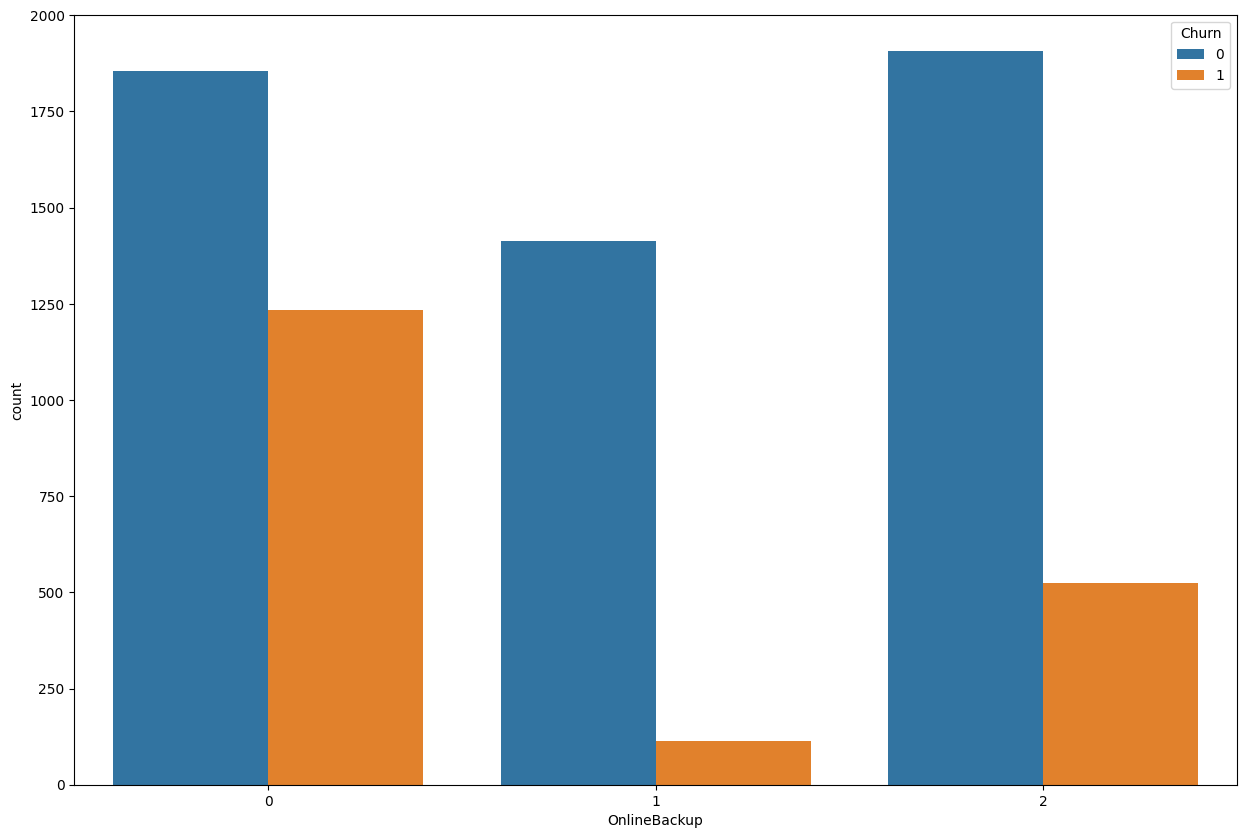

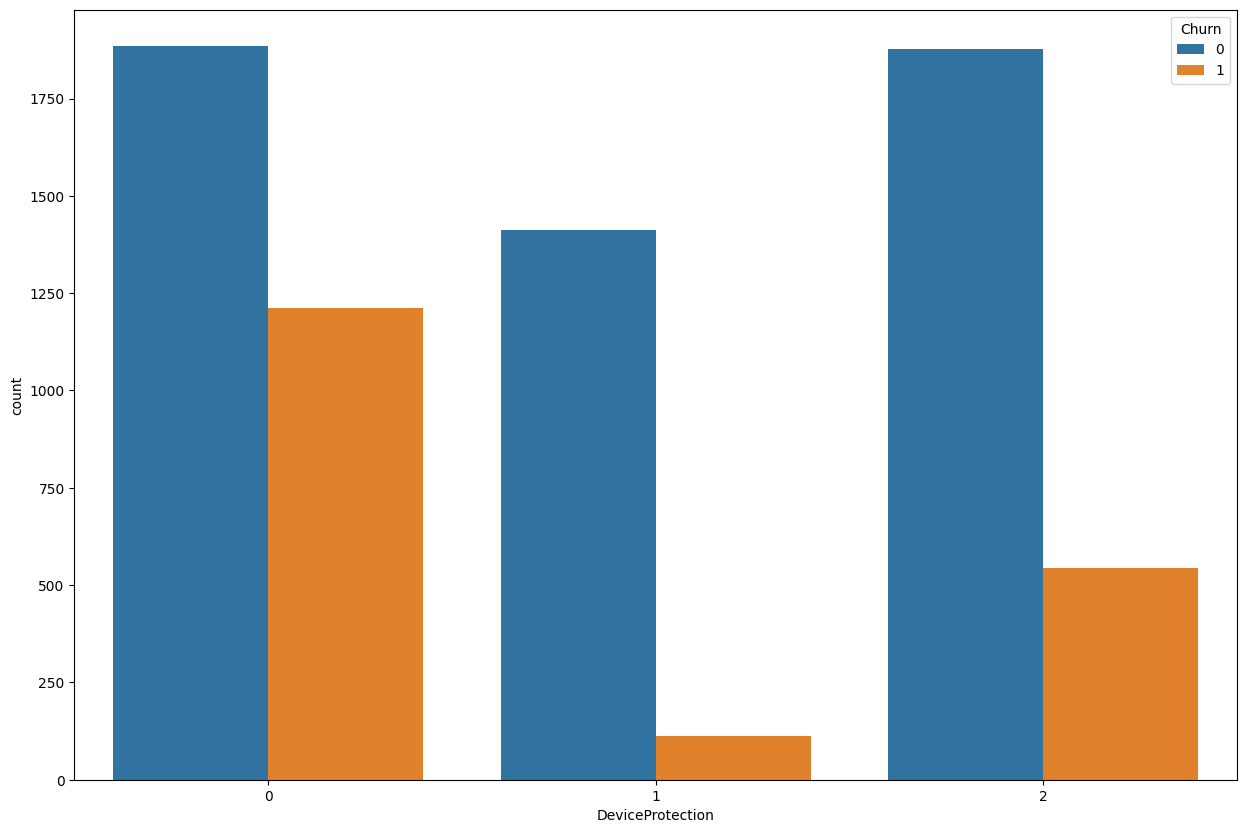

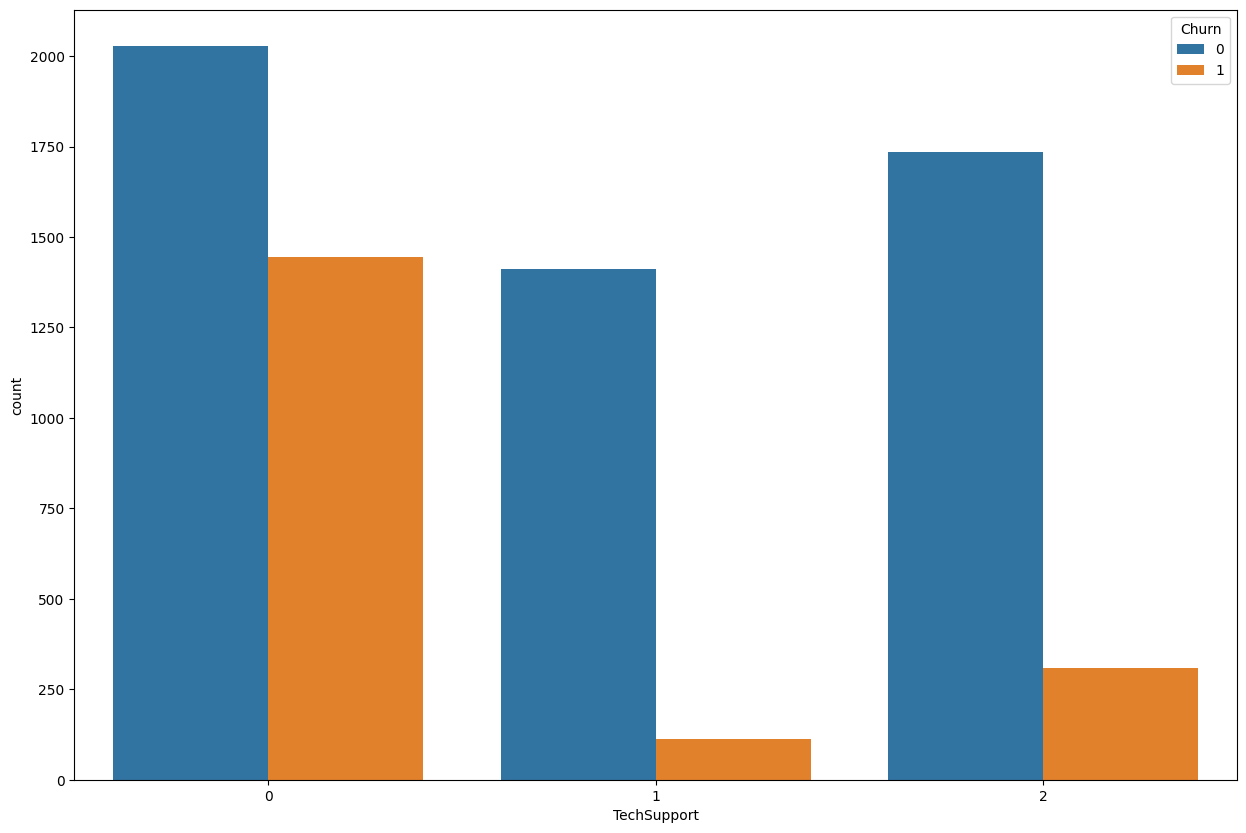

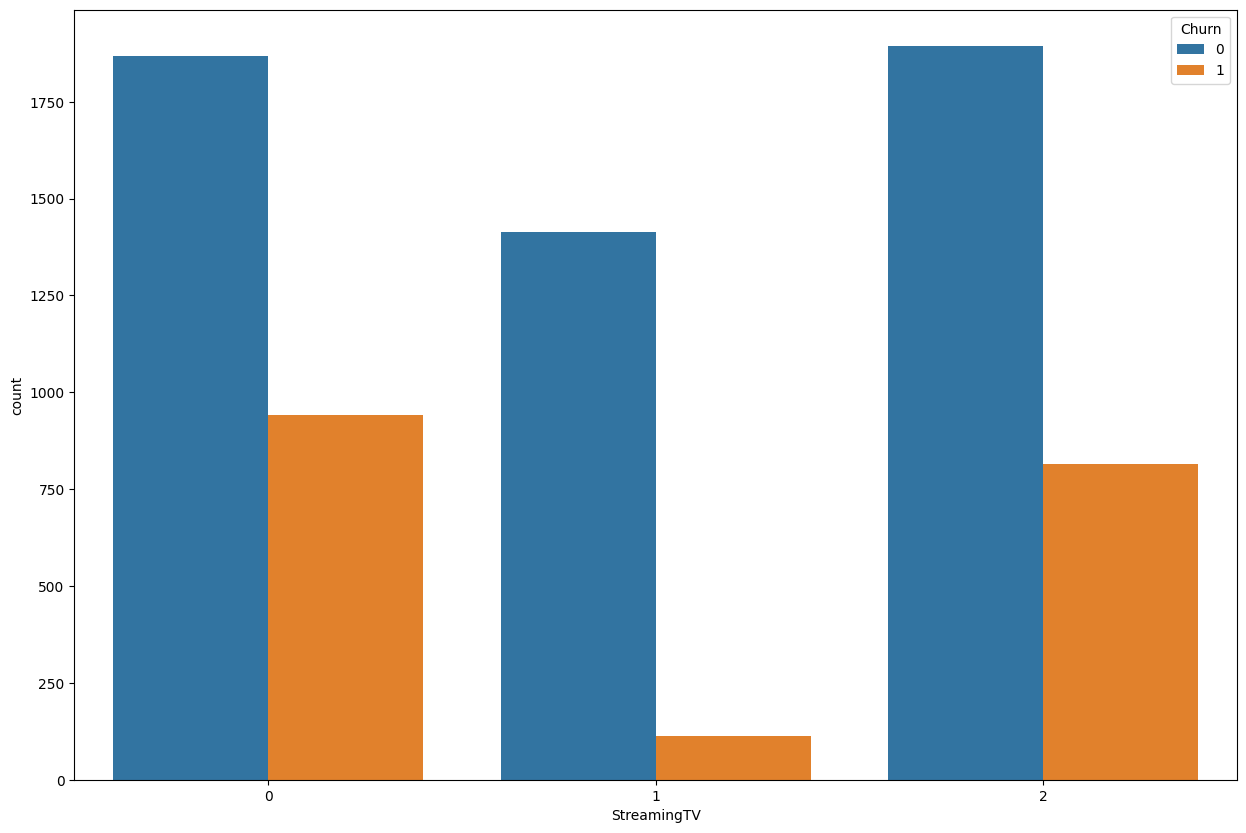

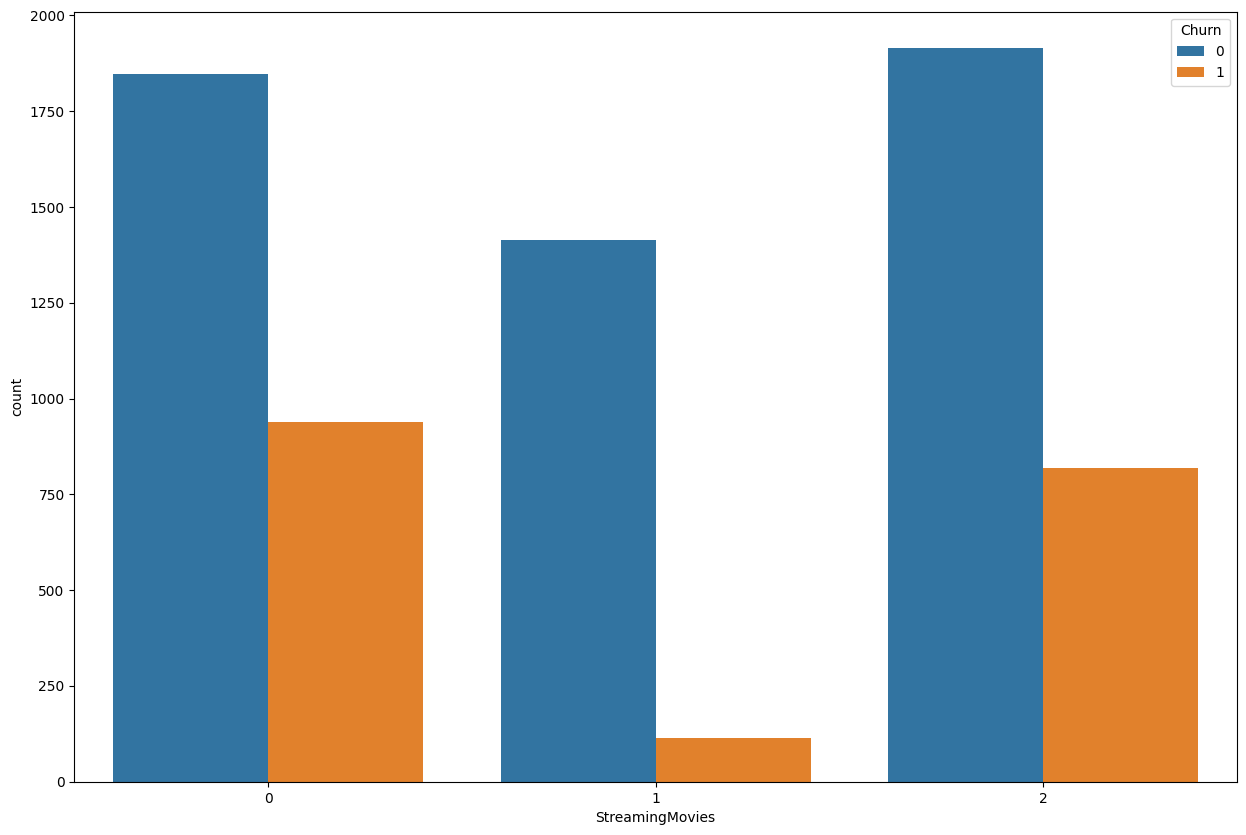

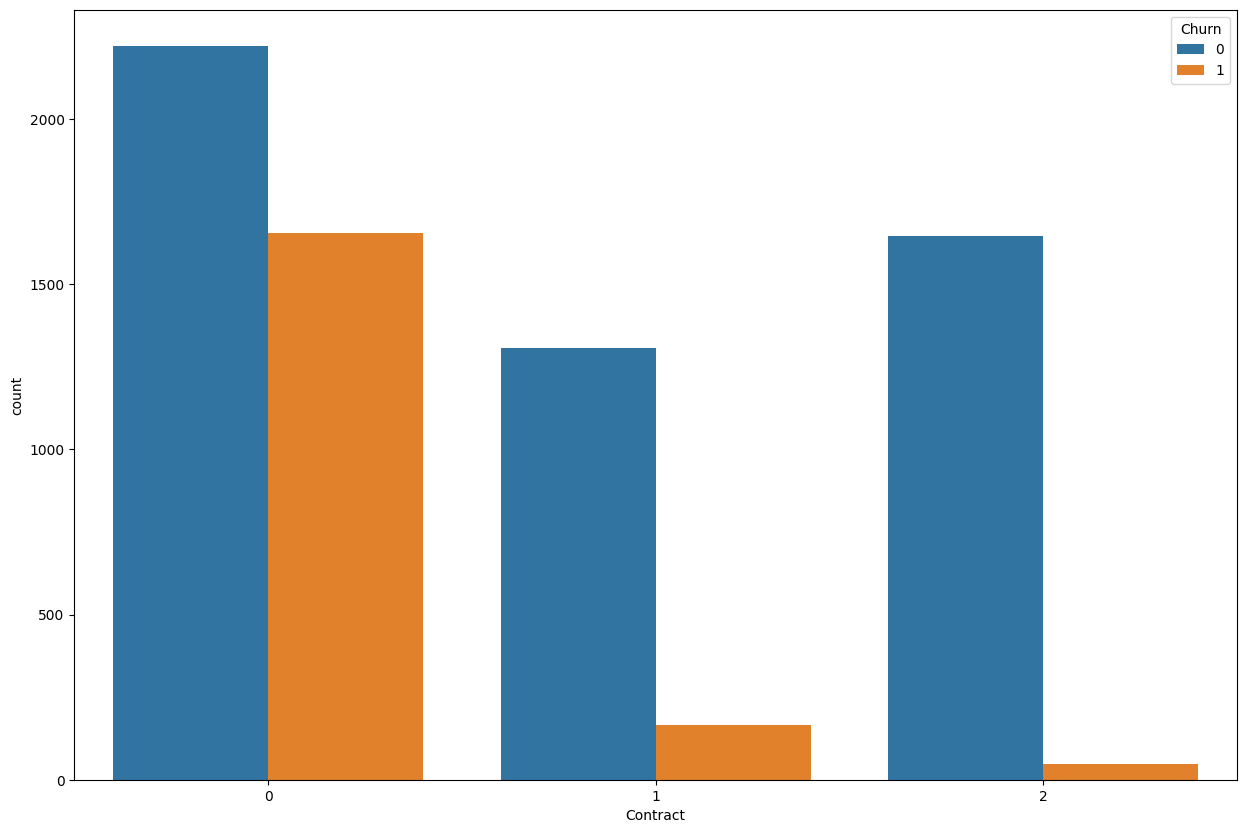

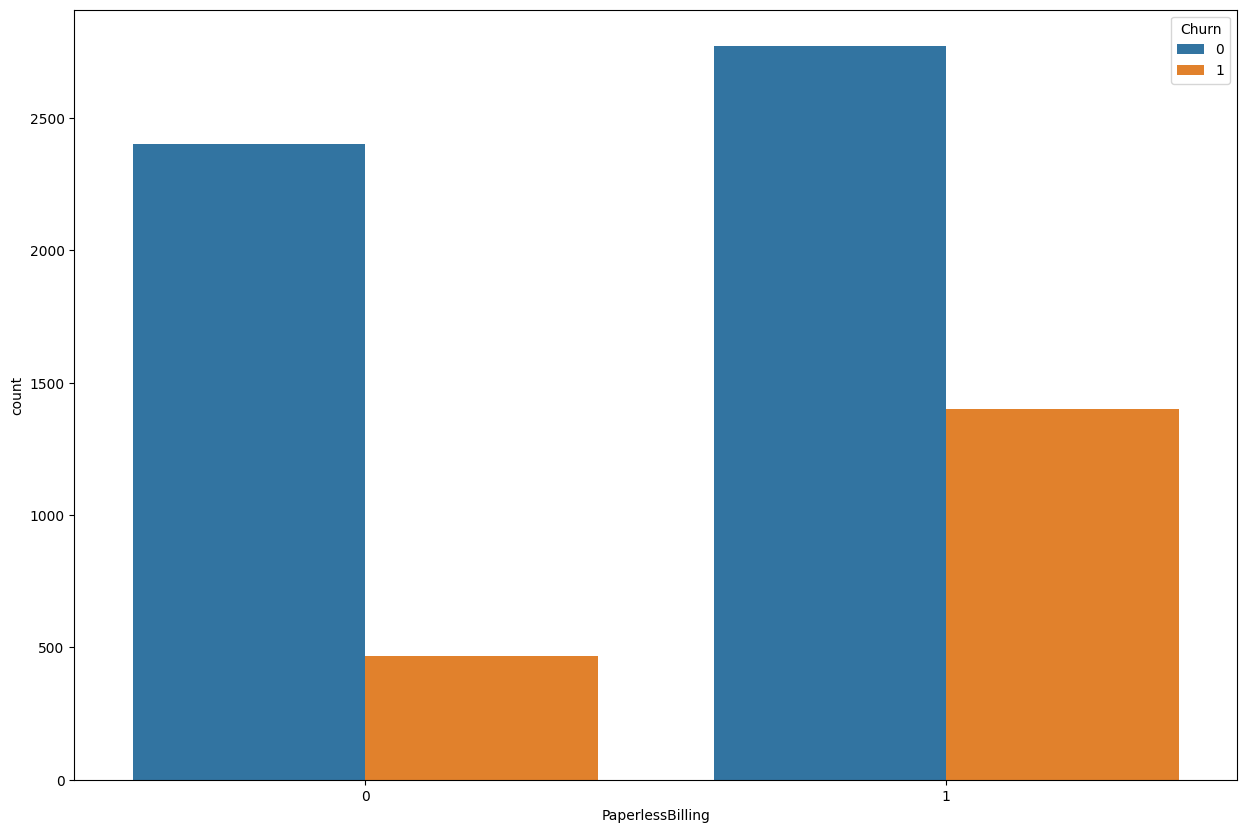

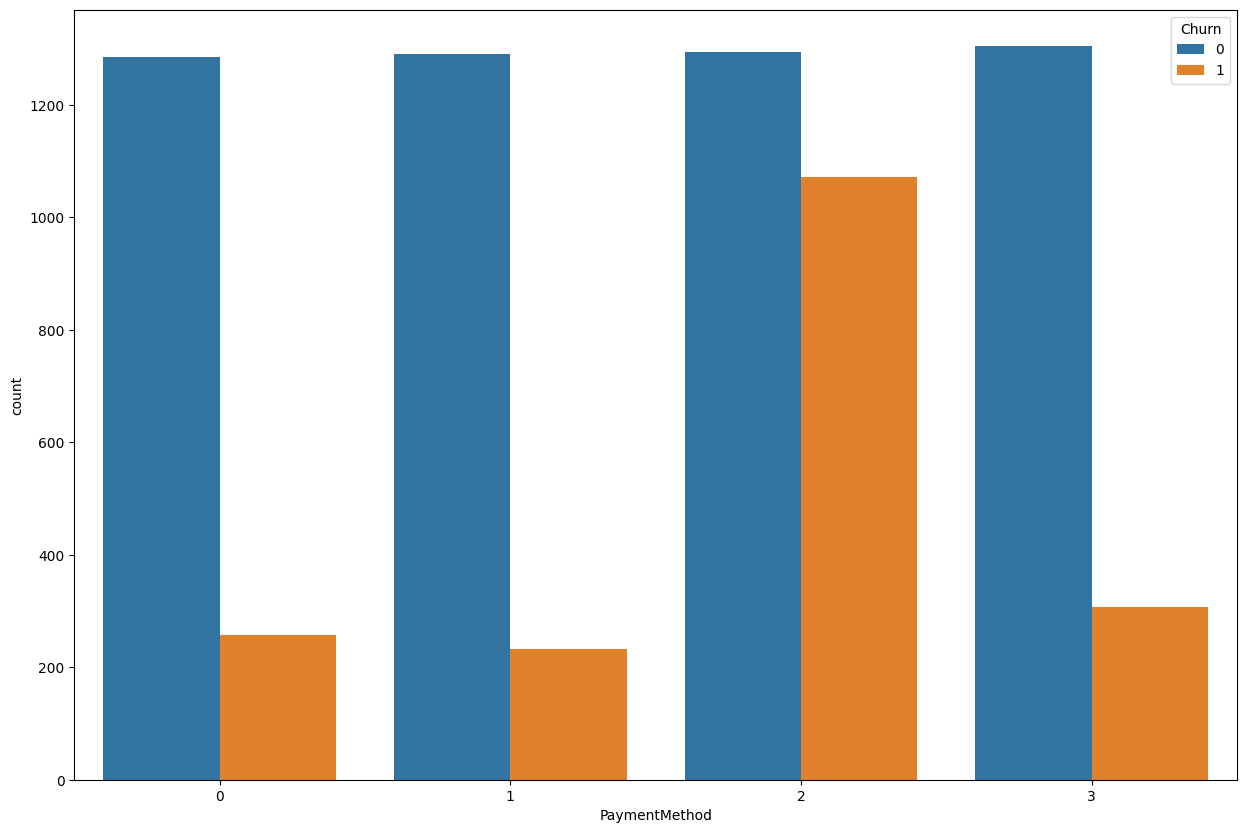

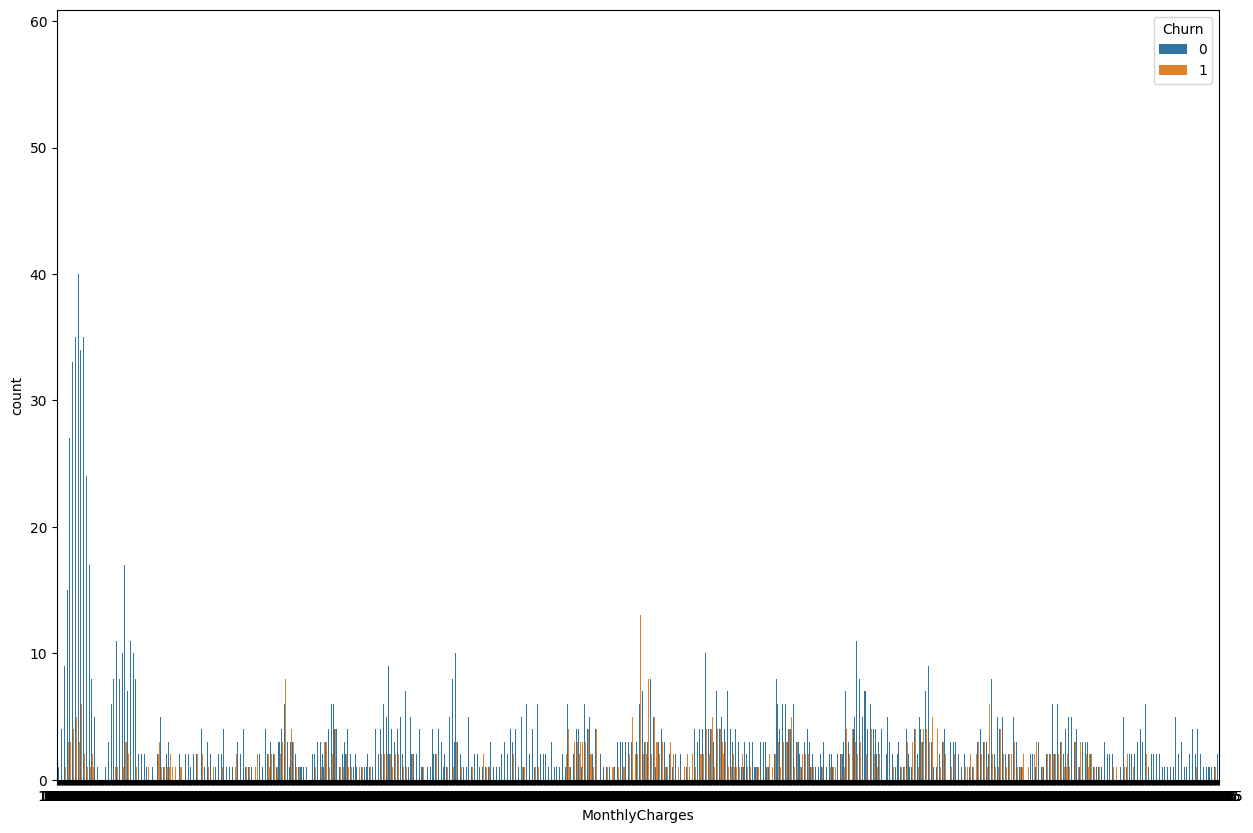

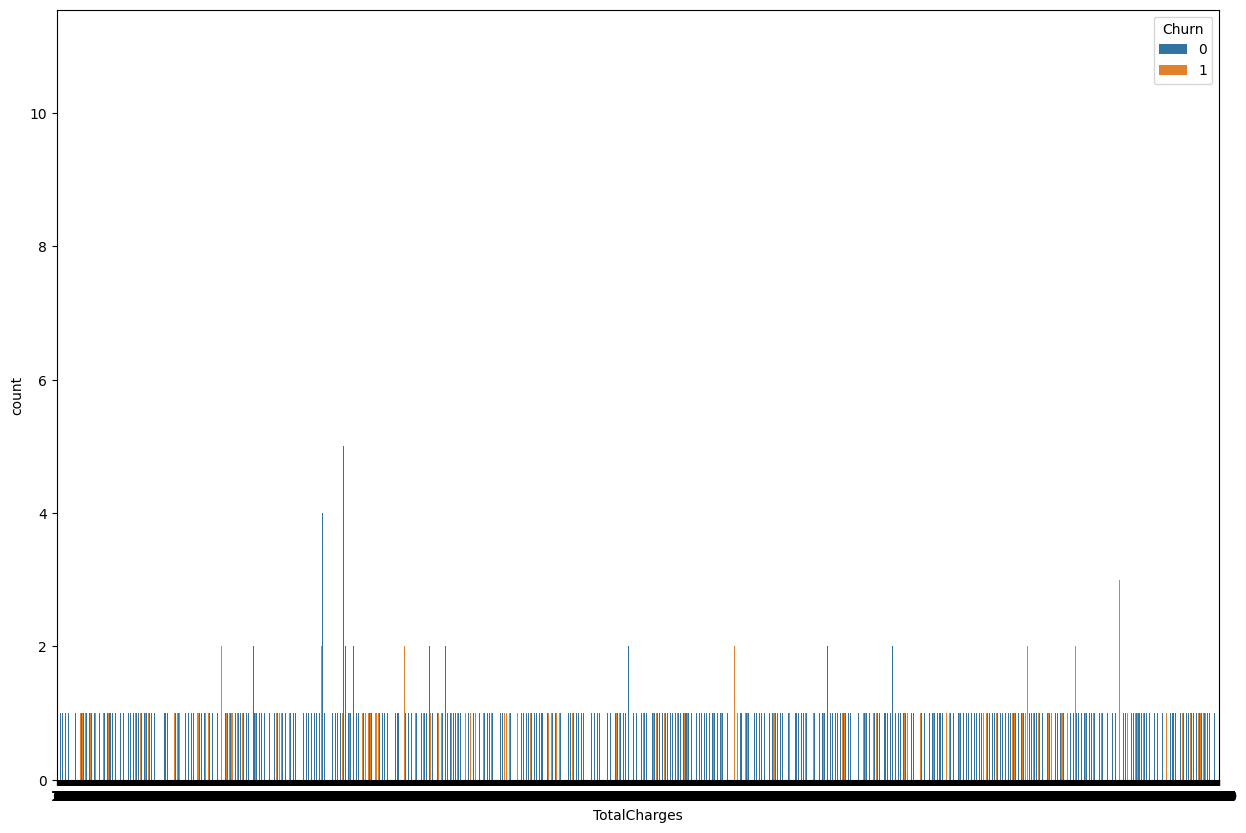

In [16]:
cols = list(df.columns)
for col in cols:
  if col != 'Churn':
      plt.figure(figsize=(15,10))
      sns.countplot(data=df,x=col,hue='Churn')
      plt.show()

In [17]:
df.drop(columns=['customerID'],inplace=True)

In [18]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


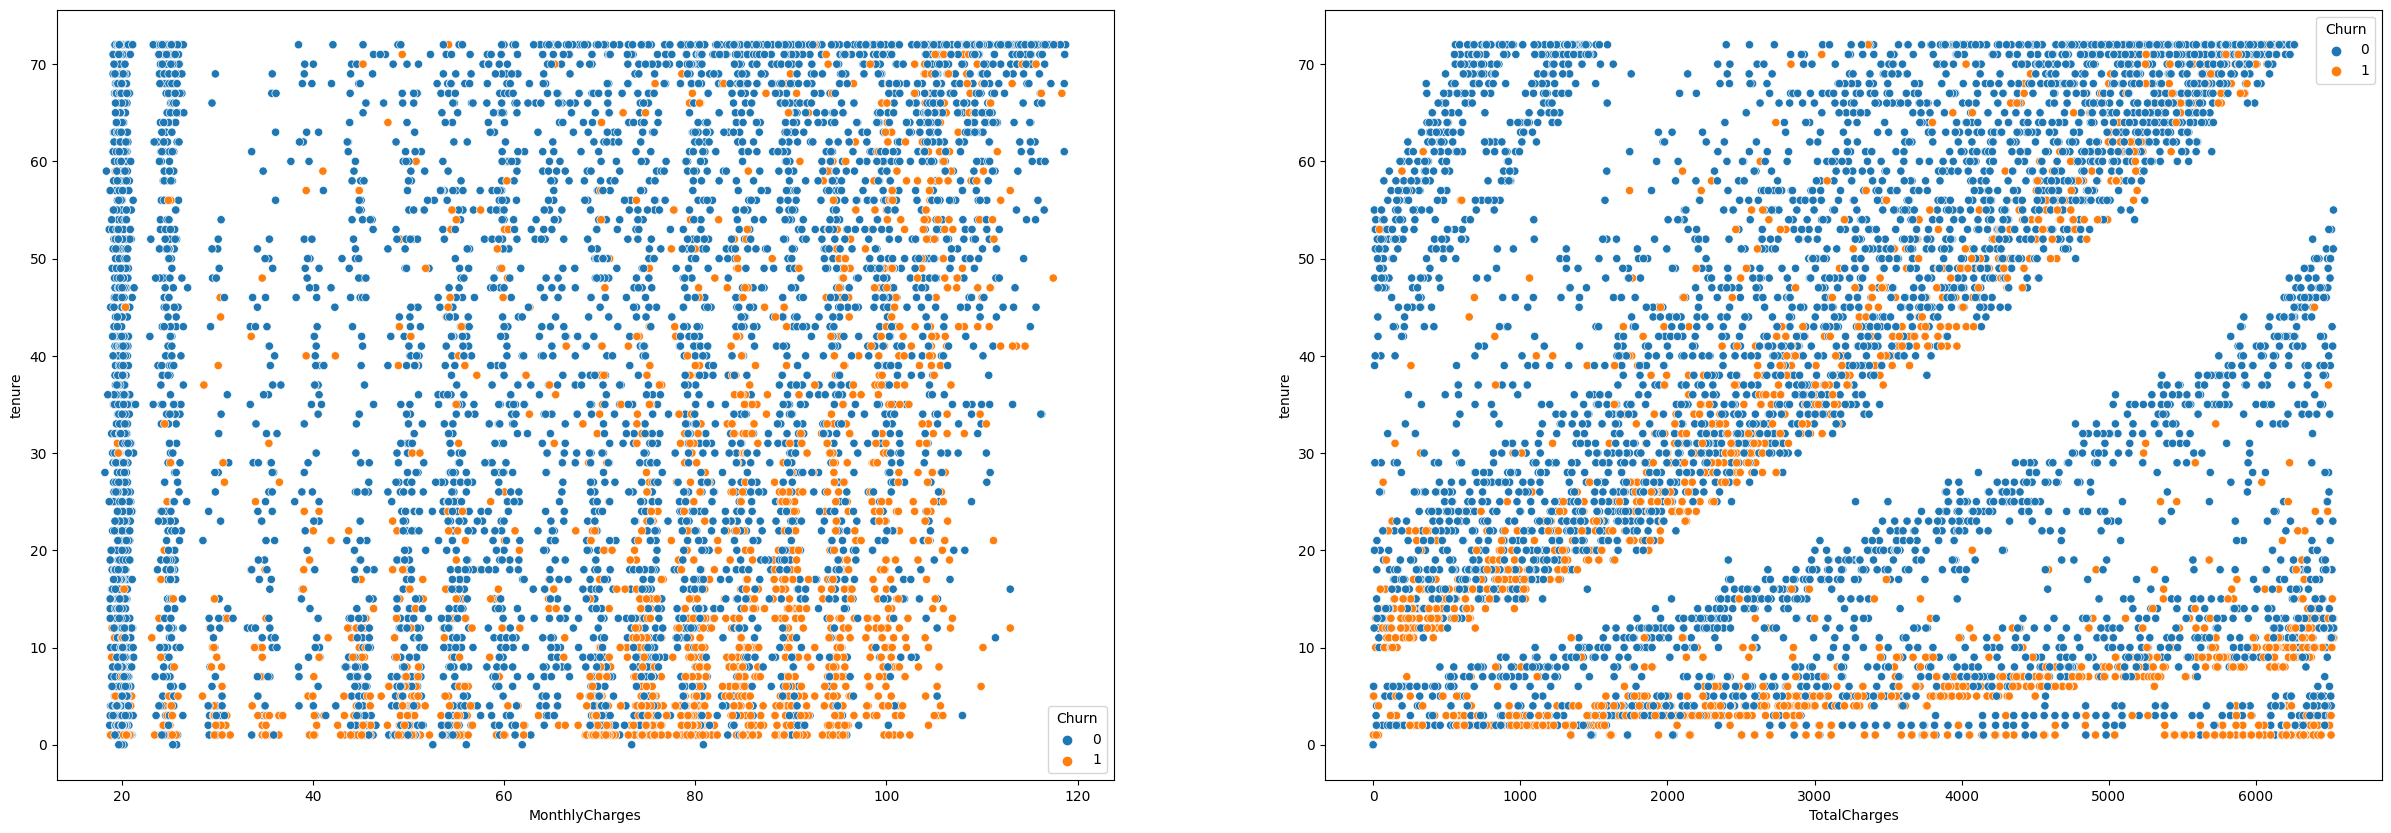

In [19]:
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
sns.scatterplot(data=df,x='MonthlyCharges',y='tenure',hue='Churn')
plt.subplot(1,2,2)
sns.scatterplot(data=df,x='TotalCharges',y='tenure',hue='Churn')
plt.show()

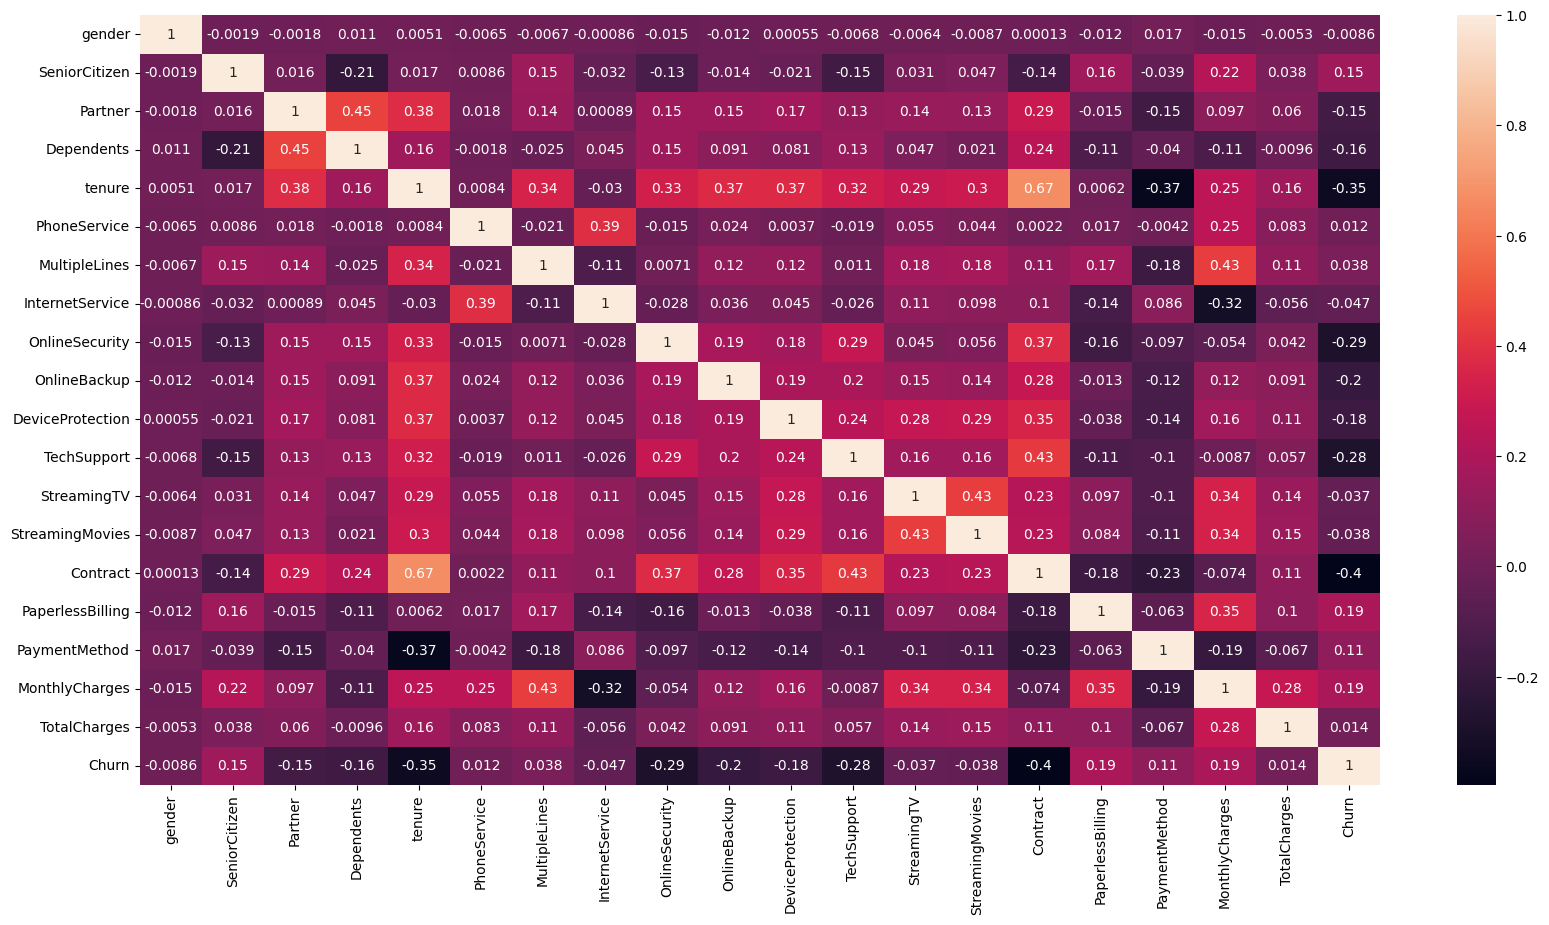

In [20]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,)
plt.show()

In [21]:
X = df.drop(columns=['Churn'])
y = df['Churn']

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.2)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(5634, 19) (1409, 19) (5634,) (1409,)


In [23]:
rf = RandomForestClassifier(random_state=20)

In [24]:
rf1 = rf.fit(x_train,y_train)
y_pred = rf1.predict(x_test)

In [46]:
def metrics(y_pred,y_test,dom):
  print(f'{dom} Metrics')
  cm = confusion_matrix(y_pred,y_test)
  sns.heatmap(cm,annot=True,fmt='g')
  print(accuracy_score(y_pred,y_test)*100)
  print(classification_report(y_pred,y_test))

In [25]:
accuracy_score(rf1.predict(x_train),y_train)*100

99.7515086971956

In [26]:
accuracy_score(y_pred,y_test)*100

77.92760823278921

In [27]:
from sklearn.model_selection import RandomizedSearchCV

In [35]:
n_estimators = [int(i) for i in np.linspace(start=200,stop=2000,num=10)]
max_features = ['auto','sqrt']
max_depth = [int(i) for i in np.linspace(10,110,num=11)]
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]
bootstrap = [True,False]
random_grid = {'n_estimators' : n_estimators, 'max_features' : max_features, 'max_depth' : max_depth, 'min_samples_split' : min_samples_split, 'min_samples_leaf' : min_samples_leaf, 'bootstrap' : bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [36]:
rf = RandomForestClassifier(random_state = 20)

In [37]:
rf_random = RandomizedSearchCV(estimator = rf, n_iter = 100, param_distributions = random_grid , cv = 3, n_jobs = -1, random_state = 20, return_train_score = True, scoring = 'neg_mean_absolute_error', verbose = 2)
rf2 = rf_random.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [38]:
rf2.best_params_

{'n_estimators': 1000,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 60,
 'bootstrap': True}

In [39]:
y_pred = rf2.predict(x_test)

Test Metrics
79.84386089425124
              precision    recall  f1-score   support

           0       0.91      0.83      0.87      1131
           1       0.49      0.65      0.56       278

    accuracy                           0.80      1409
   macro avg       0.70      0.74      0.71      1409
weighted avg       0.82      0.80      0.81      1409

None


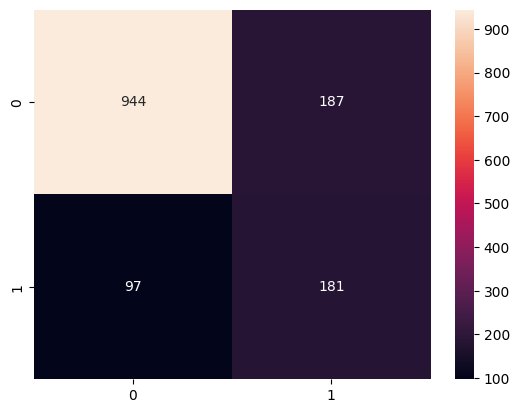

In [48]:
print(metrics(y_pred,y_test,dom='Test'))

Train Metrics
88.51615193468228
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      4470
           1       0.67      0.87      0.76      1164

    accuracy                           0.89      5634
   macro avg       0.82      0.88      0.84      5634
weighted avg       0.90      0.89      0.89      5634

None


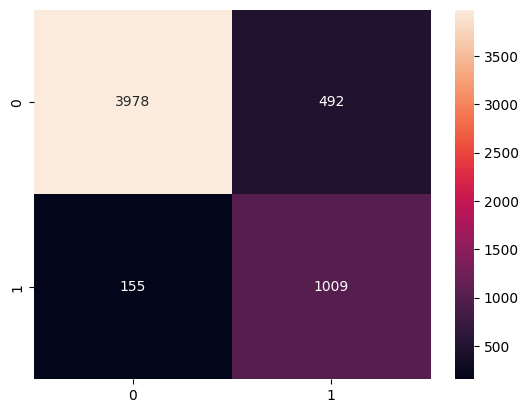

In [47]:
print(metrics(rf2.predict(x_train),y_train,dom='Train'))